# ME 7160 Project


### Solution to Van der Pol oscilator via FFT method:

#### Following equation to be solved.

**$\ddot{x} + (x^2 - 1)\dot{x} + x = Fcos(2\pi t)$**

initial values for x1
[  1.00000000e+00   9.92706245e-01   9.70931377e-01   9.34993037e-01
   8.85415476e-01   8.22921908e-01   7.48423957e-01   6.63008364e-01
   5.67921130e-01   4.64549340e-01   3.54400932e-01   2.39082696e-01
   1.20276839e-01  -2.83557456e-04  -1.20839818e-01  -2.39633326e-01
  -3.54931180e-01  -4.65051472e-01  -5.68387821e-01  -6.63432807e-01
  -7.48799959e-01  -8.23243984e-01  -8.85678929e-01  -9.35194023e-01
  -9.71066964e-01  -9.92774455e-01  -9.99999839e-01  -9.92637715e-01
  -9.70795477e-01  -9.34791750e-01  -8.85151738e-01  -8.22599566e-01
  -7.48047714e-01  -6.62583709e-01  -5.67454256e-01  -4.64047058e-01
  -3.53870569e-01  -2.38531990e-01  -1.19713822e-01   8.50672278e-04
   1.21402757e-01   2.40183878e-01   3.55461315e-01   4.65553455e-01
   5.68854330e-01   6.63857036e-01   7.49175720e-01   8.23565796e-01
   8.85942097e-01]
Initial values for a
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]
Optimiz

C:\Users\WSUadm\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\WSUadm\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\WSUadm\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



            Current function value: 1.1372425612
            Iterations: 336
            Function evaluations: 25889
            Gradient evaluations: 336
Values of x after optimization:
[ 0.90959671  0.90569258  1.03060315  1.01901498  1.01278467  0.91057797
  0.5766093   0.34053248  0.29365543  0.20183182  0.12138712  0.07577758
 -0.04659612 -0.06345601  0.07885987  0.11878815  0.05257942 -0.0030355
 -0.10612889 -0.22000525 -0.2865679  -0.49223768 -0.82321738 -0.98241955
 -1.02551685 -0.99873896 -0.86293298 -0.86647751 -0.98340854 -0.99078042
 -0.9723506  -1.00454997 -0.99294738 -1.00250022 -1.00469675 -0.77022112
 -0.4463849  -0.24503983 -0.01593612  0.21293108  0.39348916  0.72861076
  1.03700905  1.05640203  1.02451261  1.01888413  0.91166203  0.94905674
  1.03933246]
value of a
[  1.           0.94234173   0.46778233  10.32499391   0.33148553
   4.36276364   0.76814044   2.85543751   6.11063988   0.17150186
   2.5468341    2.38794174   7.39176164   6.80108405   8.64872662
   0.1

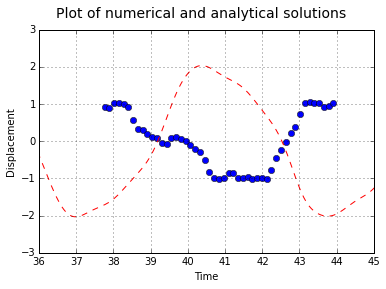

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 50 #define number of sample points
t=np.linspace(0*np.pi, 2*np.pi, N)
t=t[0:-1]

F = 1.2

a0 = 1.0*np.ones(N/2)
#x0 = 1.0*np.ones(N-1)
x0=1*np.cos((0.3*np.pi*t)/1)
#x0=2.0*np.sin(1*t)*np.cos(1*t)

x0=np.append(x0, a0)

print('initial values for x1')
print(x0[0:-(N/2)])

print('Initial values for a')
print(x0[(N-1)::])


f = F*np.cos((2*np.pi*t))
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies
#print(freq)

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    x1 = x[0:-(N/2)]
    a1 = x[(N-1)::]
    
    a2=a1[::-1]
    a2=-a2[0:-1]

    a=np.append(a1, a2)

    #a1 = np.abs(x[(N-1)::])
    
    #for i in a1:
    #    if i < 0:
    #        i = 0
    #    else:
    #        i = i
    
    #for i in range(0, N-1):
    #    if a1[i] < 0:
    #        a1[1] = 0
    #    else:
    #        a1[i] = a1[i]
              
    afreq=np.multiply(freq, a)
    X = np.fft.fft(x1)
    xddot = np.fft.ifft(-afreq**2*X)
    xdot = np.fft.ifft(1j*afreq*X)
    res = xddot + (x1**2 - 1)*xdot + x1 - f
    RES = np.sum(np.abs(res**2))
    #del a, a2
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'SLSQP', options={'eps':1e-10, 'ftol':1e-8, 'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

sol1 = sol.x[0:-(N/2)]

print('Values of x after optimization:')
print(sol1)

print('value of a')
print(sol.x[(N-1)::])
#write results into test file
#np.savetxt('results3.txt', sol.x, fmt='%1.2e')

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + F*np.cos((2*np.pi*t))])

time=np.linspace(0.0,100,2000)
xinit=np.array([0, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot((12.02*np.pi)+t, sol1, 'bo') #FFT solution plot
plt.plot(time, x[:,0] , 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([36, 45, -3, 3])
plt.grid()
plt.show()

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + A_3cos(3\omega t + 3\beta) + A_4cos(4\omega t + 4\beta) + A_5cos(5\omega t + 5\beta) + A_6cos(6\omega t + 6\beta) + A_7cos(7\omega t + 7\beta) + A_8cos(8\omega t + 8\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $A_4$,$A_5$,$A_6$,$A_7$,$A_8$,$\omega$, $\beta$ are the unknowns and will be solved for using least square fitting

In [ ]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, A4, A5, A6, A7, A8, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta)\
                   + A3*np.cos(3*omega*t + 3*beta) + A4*np.cos(4*omega*t + 4*beta)\
                   + A5*np.cos(5*omega*t + 5*beta) + A6*np.cos(6*omega*t + 6*beta)\
                   + A7*np.cos(7*omega*t + 7*beta) + A8*np.cos(8*omega*t + 8*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[9]*t + p[10]) + p[2]*np.cos(2*p[9]*t + 2*p[10])\
                + p[3]*np.cos(3*p[9]*t + 3*p[10]) + p[4]*np.cos(4*p[9]*t + 4*p[10])\
                + p[5]*np.cos(5*p[9]*t + 5*p[10]) + p[6]*np.cos(6*p[9]*t + 6*p[10])\
                + p[7]*np.cos(7*p[9]*t + 7*p[10]) + p[8]*np.cos(8*p[9]*t + 8*p[10])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 4)
plt.plot(t, sol.x, 'ro')
plt.axis([-1, 7, -3, 3])
plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

### Fitted equation can be seen below:

In [ ]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 2))
A1=sp.nsimplify(round(coeff[1], 2))
A2=sp.nsimplify(round(coeff[2], 2))
A3=sp.nsimplify(round(coeff[3], 2))
A4=sp.nsimplify(round(coeff[4], 2))
A5=sp.nsimplify(round(coeff[5], 2))
A6=sp.nsimplify(round(coeff[6], 2))
A7=sp.nsimplify(round(coeff[7], 2))
A8=sp.nsimplify(round(coeff[8], 2))
omega=sp.nsimplify(round(coeff[9], 2))
beta=sp.nsimplify(round(coeff[10], 2))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta)\
         + A3*sp.cos(3*omega*time + 3*beta) + A4*sp.cos(4*omega*time + 4*beta)\
         + A5*sp.cos(5*omega*time + 5*beta) + A6*sp.cos(6*omega*time + 6*beta)\
         + A7*sp.cos(7*omega*time + 7*beta) + A8*sp.cos(8*omega*time + 8*beta)
ans